# Digit recognizer

This a solution to the [digit recognizer competition](https://www.kaggle.com/competitions/digit-recognizer/overview) in Kaggle, which is based on the MNIST database. It includes a CNN that achieves 0.985 accuracy.

In [1]:
import numpy as np

import tensorflow as tf
from scipy.io import loadmat
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import random
import pandas as pd

# Importing the data

In [2]:
train_data = np.genfromtxt('train.csv', delimiter=',')

In [3]:
train_data.shape

(42001, 785)

In [4]:
train_data = train_data[1:, :]

In [5]:
train_data.shape

(42000, 785)

In [6]:
X = train_data[:, 1:]
y = train_data[:, 0]

In [7]:
X.shape

(42000, 784)

The label of this image is "7".


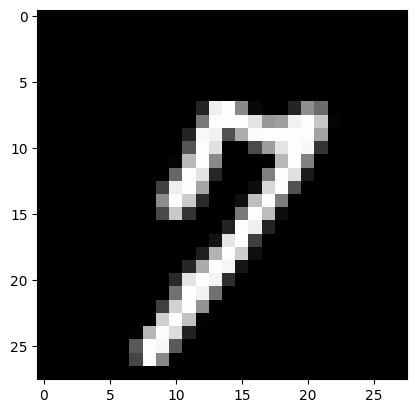

In [8]:
random_number = random.randint(0, int(X.shape[0]))

image = np.reshape(X[random_number, ], (28, 28))
print(f'The label of this image is "{int(y[random_number])}".')
plt.imshow(image, cmap='gray');

In [9]:
predict_data = np.genfromtxt('test.csv', delimiter=',')

In [10]:
predict_data.shape

(28001, 784)

In [11]:
predict_data = predict_data[1:, :]

The label of this image is unknow.


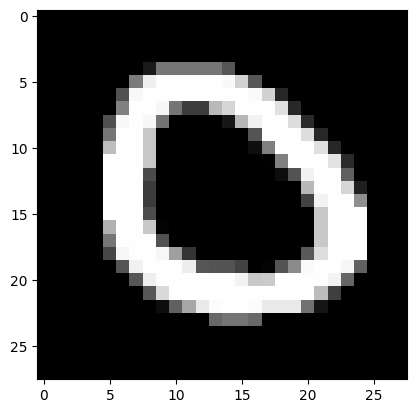

In [12]:
random_number = random.randint(0, int(predict_data.shape[0]))

image = np.reshape(predict_data[random_number, ], (28, 28))
print('The label of this image is unknow.')
plt.imshow(image, cmap='gray');

## Convolutional neural network

In [13]:
cnn_train = np.reshape(X, (X.shape[0], 28, 28)) / 255
cnn_predict = np.reshape(predict_data, (predict_data.shape[0], 28, 28)) / 255

In [14]:
model_cnn = Sequential([
        Conv2D(filters=16, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(4, 4)),
        Flatten(),
        BatchNormalization(),
        Dense(units=32, activation='relu'),
        Dropout(0.2),
        Dense(units=10, activation='softmax')
    ])

In [15]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         1160      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 8)         32        
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 8)           0         
 D)                                                              
                                                        

In [16]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [18]:
history_cnn = model_cnn.fit(cnn_train, y, validation_split=0.2, batch_size=32, epochs=30, verbose=1, callbacks=[early_stop])

Epoch 1/30
1050/1050 [==============================] - 11s 5ms/step - loss: 0.3784 - accuracy: 0.8835 - val_loss: 0.1072 - val_accuracy: 0.9705
Epoch 2/30
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1425 - accuracy: 0.9569 - val_loss: 0.0772 - val_accuracy: 0.9764
Epoch 3/30
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1122 - accuracy: 0.9666 - val_loss: 0.0598 - val_accuracy: 0.9819
Epoch 4/30
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0948 - accuracy: 0.9705 - val_loss: 0.0596 - val_accuracy: 0.9801
Epoch 5/30
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0860 - accuracy: 0.9724 - val_loss: 0.0495 - val_accuracy: 0.9830
Epoch 6/30
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0764 - accuracy: 0.9762 - val_loss: 0.0508 - val_accuracy: 0.9838
Epoch 7/30
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0764 - accuracy: 0.9758 - val_loss: 0.0517 - val_accuracy

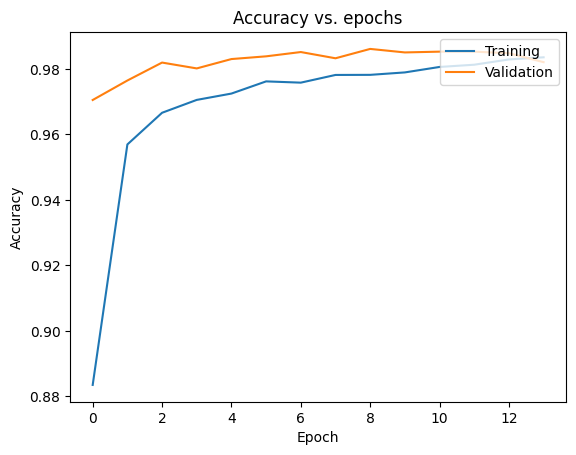

In [19]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

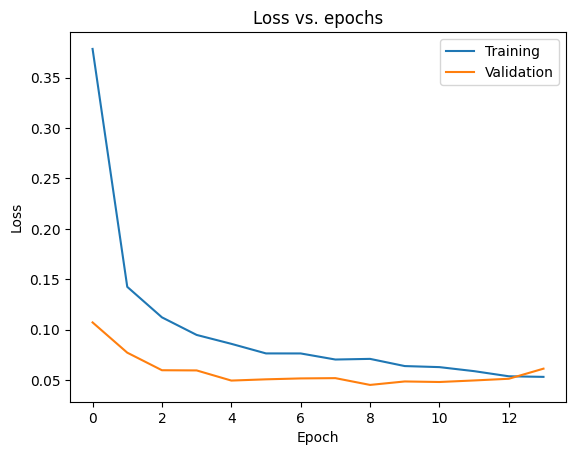

In [20]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [21]:
predictions = model_cnn.predict(cnn_predict)

875/875 [==============================] - 2s 2ms/step


In [22]:
label_predictions = np.argmax(predictions, axis=1)

In [23]:
label_predictions

array([2, 0, 9, ..., 3, 9, 2])

The predicted label for this image is "5".


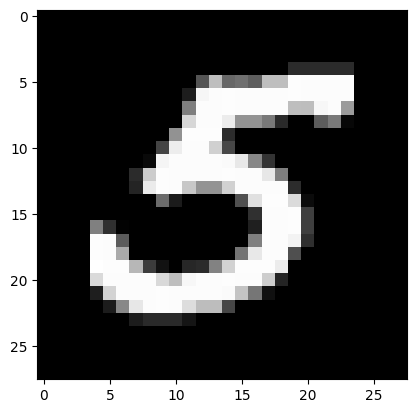

In [24]:
random_number = random.randint(0, int(cnn_predict.shape[0]))

image = cnn_predict[random_number, ] #np.reshape(cnn_predict[random_number, ], (28, 28))
print(f'The predicted label for this image is "{int(label_predictions[random_number])}".')
plt.imshow(image, cmap='gray');

## Saving the predictions as csv

In [25]:
df = pd.DataFrame()

In [26]:
df['ImageId'] = range(1, 28001)

In [27]:
df['Label'] = label_predictions

In [28]:
df.to_csv('cnn_model.csv', index=False)